## This notebook plots results for the evolution of the degeneracy parameter $\psi$ wrt time

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

from matplotlib import rc
rc('font', family='baskerville', size=22.)
rc('text', usetex=True)

In [88]:
# import data
alpha = 0.
#data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(alpha)+".dat", unpack=True)
data  = np.genfromtxt("../data/evolution_degeneracy_alpha=0.dat", unpack=True)
time  = data[0]
psi   = data[1]

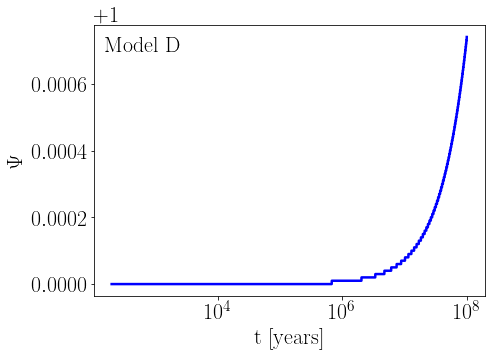

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(time, psi, lw=2.5, color="blue")

text_box = AnchoredText("Model D", frameon=False, loc=2, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

### Plot degeneracy evolution from [Auddy et al 2016](https://arxiv.org/abs/1607.04338), i.e. equation 47

In [3]:
def degenarcy_Auddy(t, M):
    """
    Time evolution of Psi as given by Auddy et al. 2016 (eq. 47)
    
    Input
    -----
        t : time [years]
        M : mass [Msun]
        
    Output
    ------
        Psi: degeneracy
    """
    return np.power(317.8 + 2.053e-6*np.power(M, -1.094)*t, -0.2794)

In [ ]:
t   = np.logspace(6, 9, 100)
M   = 0.03
Psi = degenarcy_Auddy(t, M)

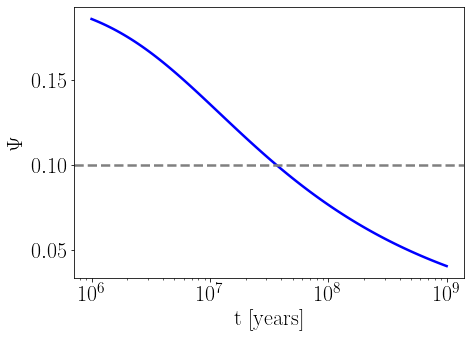

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(t, Psi, lw=2.5, color="blue")
ax.axhline(0.1, ls="--", color="grey", lw=2.5)

ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

### Sudy right-hand-side of ODE 

In [67]:
from mpmath import polylog
from scipy.interpolate import interp1d

In [97]:
def func(psi, M, T, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha):
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    f1 = 1.1634e-18*np.power(b1, 2.856)*mu_1/np.power(kR, 1.1424)/np.power(mu_e, 8./3.)
    f2 = np.power(gamma, 0.7143)/omega*np.power(1.-1.33*alpha/delta, 1.143)
    
    # return
    return (f1*f2*np.power(M, -1.094)*np.power(psi, 2.856*nu)*np.power(1+b+a*psi, 1.715))

In [98]:
psi = np.linspace(0.002, 0.999, 100)
M   = 0.03
T = np.power(10, 3.94); b1  = 2.; nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
kR = 0.01; omega=1.; gamma =2.36; delta=5.97; alpha=0.

rhs = np.zeros(100)
i   = 0

for _psi in psi:
    rhs[i] = func(_psi, M, T, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha)
    i +=1

In [99]:
data  = np.genfromtxt("../data/testing/rhs_vs_psi.dat", unpack=True)
psi_c = data[0]
rhs_c = data[1]

rhs_c = interp1d(psi_c, rhs_c)

Text(0.5, 0, '$\\Psi$')

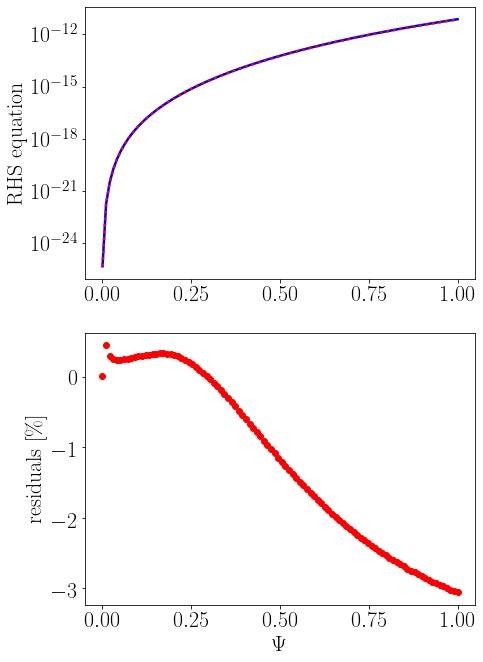

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(7,11))
ax[0].plot(psi, rhs, color="blue", lw=2.5, label="python")
ax[0].plot(psi, rhs_c(psi), color="red", ls=":", lw=2.5, label="c++")
ax[0].set_yscale("log")
ax[0].set_ylabel("RHS equation")

ax[1].plot(psi, (rhs_c(psi) - rhs)/rhs_c(psi)*100, "ro")
ax[1].set_ylabel("residuals [\%]")
ax[1].set_xlabel(r"$\Psi$")
#ax[1].set_yscale("log")

In [ ]:
psi   = np.l
rhs_1 = 